In [1]:
!nvidia-smi

Thu Mar 10 02:54:52 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


In [ ]:
# unzip the dataset
!unzip /content/Drive/MyDrive/dataset_flower.zip -d /content/Drive/MyDrive/dataset_flower

Archive:  /content/Drive/MyDrive/dataset_flower.zip
replace /content/Drive/MyDrive/dataset_flower/dataset/Bluebell/image_0241.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
from imutils import paths

In [3]:
image_path = list(paths.list_images('/content/Drive/MyDrive/dataset_flower/'))
image_path

['/content/Drive/MyDrive/dataset_flower/dataset/Daffodil/image_0007.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Daffodil/image_0023.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Daffodil/image_0079.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Daffodil/image_0016.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Daffodil/image_0054.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Daffodil/image_0066.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Daffodil/image_0043.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Daffodil/image_0070.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Daffodil/image_0014.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Daffodil/image_0002.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Daffodil/image_0030.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Daffodil/image_0040.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Daffodil/image_0077.jpg',
 '/content/Drive/MyDrive/dataset_flowe

In [4]:
import random

In [5]:
# Random shuffle the dataset
random.shuffle(image_path)
image_path

['/content/Drive/MyDrive/dataset_flower/dataset/Buttercup/image_1149.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Sunflower/image_0730.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Daffodil/image_0058.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/ColtsFoot/image_0904.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/LilyValley/image_0193.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/LilyValley/image_0232.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Tigerlily/image_0498.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Tigerlily/image_0514.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Pansy/image_1354.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Daffodil/image_0060.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Daffodil/image_0014.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Fritillary/image_0661.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/ColtsFoot/image_0934.jpg',
 '/content/Drive/MyDrive/data

In [6]:
import os
from sklearn.preprocessing import LabelEncoder

In [7]:
os.path.sep

'/'

In [8]:
# Take all the labels
labels = [p.split(os.path.sep)[-2] for p in image_path]
labels

['Buttercup',
 'Sunflower',
 'Daffodil',
 'ColtsFoot',
 'LilyValley',
 'LilyValley',
 'Tigerlily',
 'Tigerlily',
 'Pansy',
 'Daffodil',
 'Daffodil',
 'Fritillary',
 'ColtsFoot',
 'Tigerlily',
 'Fritillary',
 'Bluebell',
 'Fritillary',
 'Crocus',
 'Daffodil',
 'Fritillary',
 'Pansy',
 'Fritillary',
 'Sunflower',
 'Sunflower',
 'ColtsFoot',
 'Buttercup',
 'Tigerlily',
 'Iris',
 'Crocus',
 'Crocus',
 'Snowdrop',
 'LilyValley',
 'Buttercup',
 'Snowdrop',
 'Bluebell',
 'Daffodil',
 'Fritillary',
 'Bluebell',
 'Pansy',
 'Iris',
 'Dandelion',
 'Bluebell',
 'Windflower',
 'LilyValley',
 'Sunflower',
 'Cowslip',
 'Iris',
 'Bluebell',
 'Snowdrop',
 'Iris',
 'Bluebell',
 'Daffodil',
 'Windflower',
 'ColtsFoot',
 'Daisy',
 'Daffodil',
 'Cowslip',
 'Daffodil',
 'Cowslip',
 'Sunflower',
 'Snowdrop',
 'Dandelion',
 'LilyValley',
 'ColtsFoot',
 'Dandelion',
 'Daffodil',
 'Crocus',
 'Sunflower',
 'LilyValley',
 'Tigerlily',
 'Bluebell',
 'Windflower',
 'Pansy',
 'Tigerlily',
 'Buttercup',
 'Cowslip',
 

In [10]:
# Save your labels 
with open('/content/Drive/MyDrive/labels.txt','w') as f:
  for label in labels:
    f.write('%s\n' % label)

In [13]:
#Load your label
labels = []
with open('/content/Drive/MyDrive/labels.txt','r') as f:
  for label in f:
    labels.append(label[:-1])

In [ ]:
# Turn the name of flower into number
le = LabelEncoder()
labels = le.fit_transform(labels)
print(f'We have {len(labels)} features')

We have 1360 features


In [15]:
import keras
import tensorflow as tf

In [ ]:
dir(keras)

['Input',
 'Model',
 'Sequential',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_keras_api_constants',
 '_keras_api_constants_v1',
 'activations',
 'backend',
 'backend_config',
 'callbacks',
 'constraints',
 'distribute',
 'engine',
 'initializers',
 'keras_export',
 'layers',
 'losses',
 'metrics',
 'mixed_precision',
 'models',
 'optimizer_experimental',
 'optimizer_v1',
 'optimizer_v2',
 'optimizers',
 'preprocessing',
 'protobuf',
 'regularizers',
 'saving',
 'tf2',
 'utils']

In [ ]:
dir(tf.keras)

['Input',
 'Model',
 'Sequential',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__internal__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_sys',
 'activations',
 'applications',
 'backend',
 'callbacks',
 'constraints',
 'datasets',
 'estimator',
 'experimental',
 'initializers',
 'layers',
 'losses',
 'metrics',
 'mixed_precision',
 'models',
 'optimizers',
 'preprocessing',
 'regularizers',
 'utils',
 'wrappers']

In [16]:
model = tf.keras.applications.VGG16(weights = 'imagenet',include_top = False)

58900480/58889256 [==============================] - 0s 0us/step


In [17]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

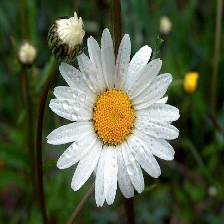

In [ ]:
# Load image with tensorflow.keras.preprocessing function
img = tf.keras.preprocessing.image.load_img(image_path[0],target_size  = (224,224))
img

In [ ]:
# Turn the image loaded into array
array = tf.keras.preprocessing.image.img_to_array(img)
print(array.shape)
array

(224, 224, 3)


array([[[21., 44., 18.],
        [25., 45., 20.],
        [32., 47., 24.],
        ...,
        [77., 80., 49.],
        [63., 67., 32.],
        [37., 41.,  6.]],

       [[26., 50., 24.],
        [30., 50., 25.],
        [35., 53., 29.],
        ...,
        [80., 83., 52.],
        [62., 66., 31.],
        [35., 39.,  4.]],

       [[27., 53., 26.],
        [30., 53., 27.],
        [35., 53., 29.],
        ...,
        [82., 82., 54.],
        [59., 63., 30.],
        [34., 38.,  5.]],

       ...,

       [[27., 47.,  0.],
        [25., 40.,  1.],
        [26., 32.,  6.],
        ...,
        [36., 65., 35.],
        [38., 64., 39.],
        [40., 66., 41.]],

       [[30., 47.,  3.],
        [25., 40.,  0.],
        [25., 37.,  1.],
        ...,
        [33., 63., 39.],
        [36., 64., 41.],
        [39., 67., 44.]],

       [[32., 49.,  5.],
        [28., 43.,  2.],
        [28., 40.,  4.],
        ...,
        [33., 63., 39.],
        [36., 64., 41.],
        [39., 67., 44.]]

In [18]:
import numpy as np
from tensorflow.keras.applications import imagenet_utils
array = np.expand_dims(array,0)

NameError: ignored

In [ ]:
array = imagenet_utils.preprocess_input(array)
array

array([[[[ -85.939   ,  -72.779   , -102.68    ],
         [ -83.939   ,  -71.779   ,  -98.68    ],
         [ -79.939   ,  -69.779   ,  -91.68    ],
         ...,
         [ -54.939003,  -36.779   ,  -46.68    ],
         [ -71.939   ,  -49.779   ,  -60.68    ],
         [ -97.939   ,  -75.779   ,  -86.68    ]],

        [[ -79.939   ,  -66.779   ,  -97.68    ],
         [ -78.939   ,  -66.779   ,  -93.68    ],
         [ -74.939   ,  -63.779   ,  -88.68    ],
         ...,
         [ -51.939003,  -33.779   ,  -43.68    ],
         [ -72.939   ,  -50.779   ,  -61.68    ],
         [ -99.939   ,  -77.779   ,  -88.68    ]],

        [[ -77.939   ,  -63.779   ,  -96.68    ],
         [ -76.939   ,  -63.779   ,  -93.68    ],
         [ -74.939   ,  -63.779   ,  -88.68    ],
         ...,
         [ -49.939003,  -34.779   ,  -41.68    ],
         [ -73.939   ,  -53.779   ,  -64.68    ],
         [ -98.939   ,  -78.779   ,  -89.68    ]],

        ...,

        [[-103.939   ,  -69.779   ,  -

In [ ]:
array.shape

(1, 224, 224, 3)

In [21]:
from tqdm import tqdm
print(len(image_path))

1360


In [23]:
# Load image and resize into VGG16 input (224,224)
list_image = []
for i in tqdm(range(len(image_path))):
  path = image_path[i]
  # load the image 
  image = tf.keras.preprocessing.image.load_img(path,target_size = (224,224))
  # turn the image into array
  array = tf.keras.preprocessing.image.img_to_array(image)
  # expand the dim of image (number,height,width,channels)
  array = np.expand_dims(array,0)
  # preprocess the image with imagenet utils
  array = imagenet_utils.preprocess_input(array)
  list_image.append(array)
list_image

100%|██████████| 1360/1360 [01:12<00:00, 18.86it/s]


[array([[[[ -49.939003,  -52.779   ,  -76.68    ],
          [ -48.939003,  -51.779   ,  -75.68    ],
          [ -47.939003,  -50.779   ,  -74.68    ],
          ...,
          [ -83.939   ,  -92.779   , -105.68    ],
          [ -83.939   ,  -92.779   , -105.68    ],
          [ -83.939   ,  -92.779   , -105.68    ]],
 
         [[ -49.939003,  -52.779   ,  -76.68    ],
          [ -48.939003,  -51.779   ,  -75.68    ],
          [ -47.939003,  -50.779   ,  -74.68    ],
          ...,
          [ -83.939   ,  -92.779   , -105.68    ],
          [ -83.939   ,  -92.779   , -105.68    ],
          [ -83.939   ,  -92.779   , -105.68    ]],
 
         [[ -49.939003,  -52.779   ,  -76.68    ],
          [ -48.939003,  -51.779   ,  -75.68    ],
          [ -47.939003,  -50.779   ,  -74.68    ],
          ...,
          [ -83.939   ,  -92.779   , -105.68    ],
          [ -83.939   ,  -92.779   , -105.68    ],
          [ -83.939   ,  -92.779   , -105.68    ]],
 
         ...,
 
         [[ 

In [24]:
X = np.vstack((list_image))
X.shape # 1360 * 224

(1360, 224, 224, 3)

In [25]:
with open('/content/Drive/MyDrive/X.npy','wb') as f:
  np.save(f,X)

In [10]:
import numpy as np
import tensorflow as tf 
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16

In [11]:
from google.colab import  drive
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [12]:
model  = VGG16(weights = 'imagenet',include_top = False)

In [13]:
# load input storage as numpy array
X = np.load('/content/Drive/MyDrive/X.npy')
X.shape

(1360, 224, 224, 3)

In [14]:
#Load your label
labels = []
with open('/content/Drive/MyDrive/labels.txt','r') as f:
  for label in f:
    labels.append(label[:-1])

In [8]:
# Use pretrain model to take the features of image, c
features = model.predict(X)

In [ ]:
features.shape # the feature layer extracted from 1360 image

(1360, 7, 7, 512)

In [9]:
# Save your features again
with open('/content/Drive/MyDrive/features.npy','wb') as f:
  np.save(f,features)

In [15]:
# Load the features
features = np.load('/content/Drive/MyDrive/features.npy',allow_pickle = True)
features.shape

(1360, 7, 7, 512)

In [17]:
features.shape[-1]

512

In [18]:
# random choice
random_layer = np.random.randint(0,features.shape[-1])
random_layer

245

Text(0.5, 1.0, 'pic: 1249 layer: 245')

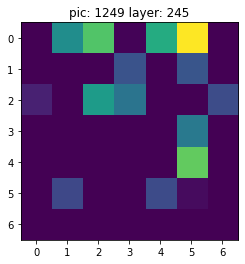

In [19]:
random_pic  = np.random.randint(0,features.shape[0])
plt.imshow(features[random_pic][:,:,random_layer])
plt.title(f'pic: {random_pic} layer: {random_layer}')

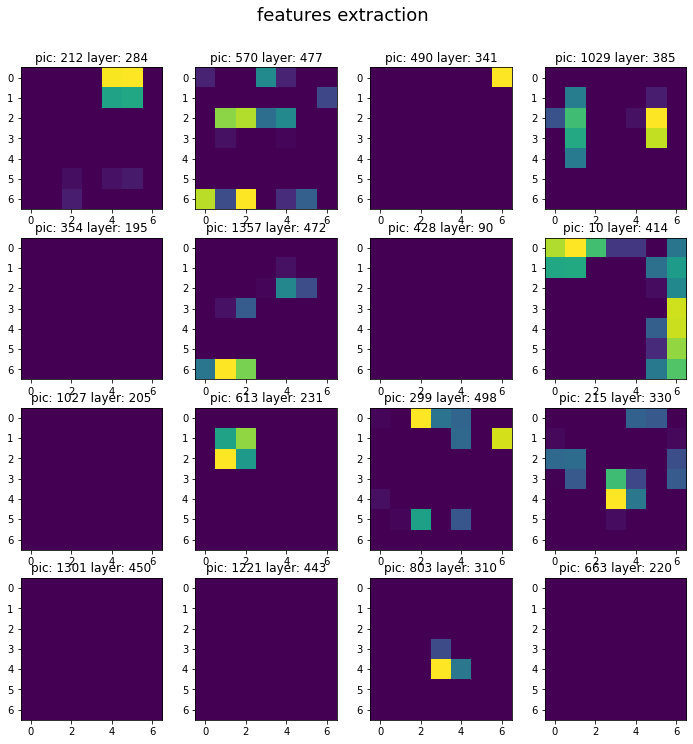

In [20]:
fig,ax = plt.subplots(nrows= 4,ncols = 4,figsize = (12,12))
plt.subplots_adjust(hspace =0.2)
fig.suptitle('features extraction',fontsize = 18,y =0.95)

for i in range(4*4):
  ax = plt.subplot(4,4,i+1)
  random_layer = np.random.randint(0,features.shape[-1])
  random_pic  = np.random.randint(0,features.shape[0])
  plt.imshow(features[random_pic][:,:,random_layer])
  plt.title(f'pic: {random_pic} layer: {random_layer}')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

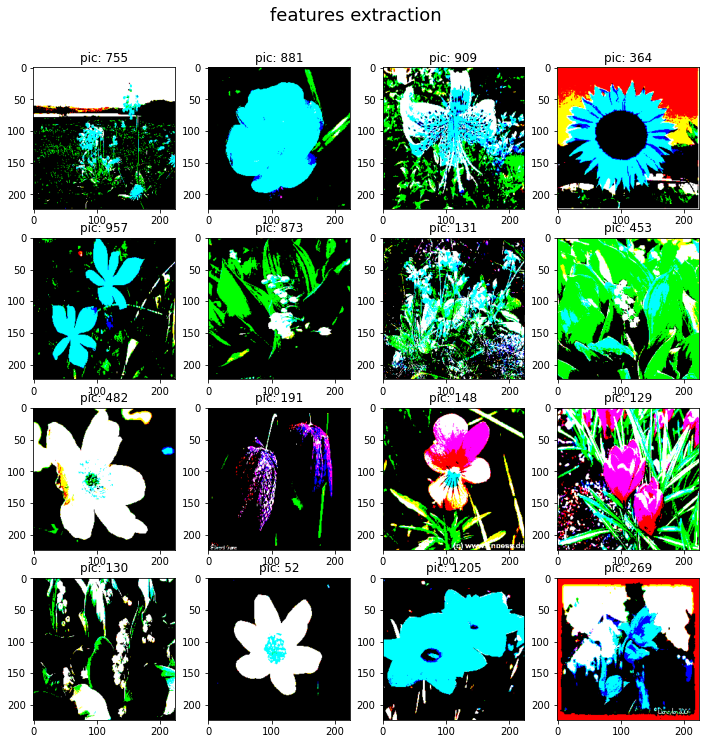

In [21]:
# Plot random dataset
fig,ax = plt.subplots(nrows= 4,ncols = 4,figsize = (12,12))
plt.subplots_adjust(hspace =0.2)
fig.suptitle('features extraction',fontsize = 18,y =0.95)

for i in range(4*4):
  ax = plt.subplot(4,4,i+1)
  random_layer = np.random.randint(0,X.shape[-1])
  random_pic  = np.random.randint(0,X.shape[0])
  plt.imshow(X[random_pic])
  plt.title(f'pic: {random_pic}')

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report

In [23]:
# Reshape the features
features = features.reshape((features.shape[0],512*7*7))
print(features.shape)

(1360, 25088)


In [24]:
X_train,X_test,y_train,y_test = train_test_split(features,labels,test_size =0.2,random_state = 42)

In [25]:
print(f'X_train.shape {X_train.shape}')
print(f'y_train.shape {len(y_train)}')
print(f'X_test.shape {X_test.shape}')
print(f'y_test.shape {len(y_test)}')

X_train.shape (1088, 25088)
y_train.shape 1088
X_test.shape (272, 25088)
y_test.shape 272


In [26]:
# Grid search to find the best parameter for the model C = 1/lamba
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
params = {'C':[0.1,1.0,1.0,100.0]}
model = GridSearchCV(LogisticRegression(),params)

In [27]:
model = GridSearchCV(LogisticRegression(), params)
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1.0, 1.0, 100.0]})

In [28]:
print('Best parameter for the model {}'.format(model.best_params_))

Best parameter for the model {'C': 100.0}


In [29]:
# predict preds
preds = model.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

    Bluebell       0.80      1.00      0.89        12
   Buttercup       0.87      0.81      0.84        16
   ColtsFoot       1.00      0.82      0.90        17
     Cowslip       0.59      0.94      0.73        17
      Crocus       1.00      0.90      0.95        21
    Daffodil       0.92      0.73      0.81        15
       Daisy       1.00      1.00      1.00        18
   Dandelion       1.00      1.00      1.00        12
  Fritillary       1.00      0.75      0.86        12
        Iris       0.90      0.82      0.86        11
  LilyValley       0.94      0.88      0.91        17
       Pansy       1.00      1.00      1.00        16
    Snowdrop       0.80      0.89      0.84        18
   Sunflower       1.00      1.00      1.00        17
   Tigerlily       0.90      0.95      0.93        20
       Tulip       0.89      0.84      0.86        19
  Windflower       1.00      0.93      0.96        14

    accuracy              

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le  = LabelEncoder()

In [36]:
# Encoder the label and split train test again
labels = le.fit_transform(labels)

In [42]:
X_train,X_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2, random_state = 42)

In [45]:
y_train = y_train.reshape(-1,1)

In [46]:
y_test = y_test.reshape(-1,1)

In [50]:
# build a logistic regression model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(128,activation = 'relu'),
                             tf.keras.layers.Dense(56,activation = 'relu'),
                             tf.keras.layers.Dense(17,activation = 'softmax')
])
model.compile(loss =tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

In [51]:
# Fit the model
history = model.fit(X_train,y_train,epochs = 1,verbose = 1)

ValueError: ignored